<a href="https://colab.research.google.com/github/techinrio/dadosinrio/blob/main/Dados_in_rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Padrões de escrita no código




- Nome de variável: nome_outro_nome (snake case)
- Nome de Função Nativa da API: Inglês, por exemplo: get_token (snake case)
- Nome de Função Criada para Aplicação: Português, por exemplo: buscar_informacoes (snake case)
- Nome de DataFrame: Começa com df, por exemplo, df_todos_albuns (snake case)



# <font color='pink'>***Instalando o a biblioteca do Spotipy***</font>



### Importando os pacotes necessários para tratamento e estatística


In [10]:
# Instalando a biblioteca de Spotify
!pip install spotipy

In [11]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import os
import base64
import json
import spotipy
from credenciais import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials
from requests import post
from requests.api import get
from pickle import GET
import seaborn as sns

# controlando os avisos
import warnings
warnings.filterwarnings('ignore')

#configurações do Pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)



# <font color='pink'>***Spotify Client Credentials***</font>



In [12]:
# Utilizando as credenciais para conectar a API
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# REQUISIÇÃO

In [13]:
# Realiza o método GET para realizar a extração do Token de acesso
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }

    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

# Realiza a autorização da conexão do token
def get_auth_header(token):
  return{"Authorization" : "Bearer " + token}


# Buscando o artista desejado e retorna apenas o nome e a conexão
# com o resultado em json do artista pelo ID do artista

def search_for_artist(token, artist_name):
  url = "https://api.spotify.com/v1/search"
  headers = get_auth_header(token)
  query = f"?q={artist_name}&type=artist&limit=1"

  query_url = url + query
  result = get(query_url, headers=headers)
  json_result = json.loads(result.content)["artists"]["items"]

  if len(json_result) == 0:
    print("No artist with this name exists....")
    return None
  return json_result[0]


# Buscando as canções mais populares de acordo com o Spotify
def get_top_10_songs(token, artist_id):
  url = f"http://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=BR"
  headers = get_auth_header(token)
  result = get(url, headers=headers)
  json_result = json.loads(result.content)["tracks"]
  return json_result


# Conexão com a API através do Cantore
token = get_token()
result = search_for_artist(token, "Ludmilla")
artist_id = result["id"]


# <font color='pink'>***Tratamento de Dados***</font>

### Definindo datasets

In [14]:
# Buscando todos os álbuns do artista
def buscar_informacoes(artist_id,album_type):
  all_albums = []
  offset = 0
  limit = 50
  while True:
      albums = sp.artist_albums(artist_id, album_type, limit=limit, offset=offset)

      if not albums['items']:
          break
      all_albums.extend(albums['items'])
      offset += limit
  for album in all_albums:
      print(album['name'])
  return all_albums


##<font color='green'>***Tratamento de dados do álbum***

In [15]:
# atribuindo a um dataset e inserindo o parâmetro de álbum
df_todos_albuns = pd.DataFrame(buscar_informacoes(artist_id,'album'))

VILÃ
Numanice #2 (Ao Vivo) - Deluxe
Numanice #2 (Ao Vivo)
Numanice #2
Numanice (Ao vivo)
Hello mundo
Hello mundo (Ao vivo)
A danada sou eu
Hoje


In [16]:
# Verificação do dataframe antes do tratamento
df_todos_albuns.head()

,album_group,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/2c...,https://api.spotify.com/v1/albums/2cp016R4eqJx...,2cp016R4eqJx2SmU9E5rxh,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",VILÃ,2023-03-24,day,15,album,spotify:album:2cp016R4eqJx2SmU9E5rxh
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/6i...,https://api.spotify.com/v1/albums/6iCqu8WWngOq...,6iCqu8WWngOqpEGxGthyvv,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Numanice #2 (Ao Vivo) - Deluxe,2022-12-16,day,23,album,spotify:album:6iCqu8WWngOqpEGxGthyvv
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/1s...,https://api.spotify.com/v1/albums/1sikBy4Cu6l9...,1sikBy4Cu6l99M6Sd6mDdu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Numanice #2 (Ao Vivo),2022-08-23,day,17,album,spotify:album:1sikBy4Cu6l99M6Sd6mDdu
3,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/5x...,https://api.spotify.com/v1/albums/5xm4qlyamtTn...,5xm4qlyamtTnDKpAhVAtX3,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Numanice #2,2022-01-26,day,10,album,spotify:album:5xm4qlyamtTnDKpAhVAtX3
4,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/5u...,https://api.spotify.com/v1/albums/5u9JxohIzAYC...,5u9JxohIzAYCPE53Ev4uiN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Numanice (Ao vivo),2021-01-29,day,14,album,spotify:album:5u9JxohIzAYCPE53Ev4uiN


In [17]:
# Fatiando a renomeando as colunas do dataframe de todos os álbuns
df_todos_albuns = df_todos_albuns[['type','artists','available_markets','id','name','release_date','release_date_precision','total_tracks']]
df_todos_albuns.columns = ['tipo','artista','paises_disponiveis','id','nome_album','data_lancamento','precisao_lancamento','total_faixa']

#Tratamento para inserir apenas os nomes do artista na coluna "artist"
for i in range(len(df_todos_albuns['artista'])):
  for j in range(len(df_todos_albuns['artista'][i])):
    df_todos_albuns['artista'][i][j] = df_todos_albuns['artista'][i][j]['name']

In [18]:
#verificando dataframe do álbum depois do tratamento
df_todos_albuns.head()

,tipo,artista,paises_disponiveis,id,nome_album,data_lancamento,precisao_lancamento,total_faixa
0,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",2cp016R4eqJx2SmU9E5rxh,VILÃ,2023-03-24,day,15
1,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",6iCqu8WWngOqpEGxGthyvv,Numanice #2 (Ao Vivo) - Deluxe,2022-12-16,day,23
2,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1sikBy4Cu6l99M6Sd6mDdu,Numanice #2 (Ao Vivo),2022-08-23,day,17
3,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",5xm4qlyamtTnDKpAhVAtX3,Numanice #2,2022-01-26,day,10
4,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",5u9JxohIzAYCPE53Ev4uiN,Numanice (Ao vivo),2021-01-29,day,14


In [19]:
df_todos_albuns['total_faixa'].sum()

141

In [20]:
# EDUARDA
# Cria dataframe somente com a informação de disponibilidade do album nos diferentes países
df_albuns_paises = df_todos_albuns[['nome_album', 'id', 'paises_disponiveis']]
df_albuns_paises.head()

,nome_album,id,paises_disponiveis
0,VILÃ,2cp016R4eqJx2SmU9E5rxh,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,Numanice #2 (Ao Vivo) - Deluxe,6iCqu8WWngOqpEGxGthyvv,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Numanice #2 (Ao Vivo),1sikBy4Cu6l99M6Sd6mDdu,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,Numanice #2,5xm4qlyamtTnDKpAhVAtX3,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,Numanice (Ao vivo),5u9JxohIzAYCPE53Ev4uiN,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


In [ ]:
# EDUARDA
# Separa a coluna com a lista de países, deixando cada pais em uma linha.
df_albuns_paises = df_albuns_paises.explode('paises_disponiveis').reset_index(drop=True)
df_albuns_paises.head()

In [ ]:
# EDUARDA
# Quantifica em quantos países os albuns estão disponíveis
df_albuns_paises['nome_album'].value_counts()

In [ ]:
# EDUARDA
# Em quantos paises distintos os albuns estão disponíveis?
len(df_albuns_paises['paises_disponiveis'].unique())

In [ ]:
# EDUARDA
# Qual o único pais em que está disponível o album 'A danada sou eu'?
print(df_albuns_paises[df_albuns_paises.nome_album ==  'A danada sou eu'])

# Achei esse retorno esquisito. US é o código de Estados Unidos, porém esse album está disponível pelo menos no Brasil também.

In [ ]:
#Pegando a descrição do álbum para total de faixa
df_todos_albuns.describe()

##<font color='green'>***Tratamento de dados de todas as músicas***

In [23]:
def search_for_music(token, album_id):
  url = "https://api.spotify.com/v1/albums/" + album_id + "/tracks?market=br&limit=50&offset=0"
  headers = get_auth_header(token)

  result = get(url, headers=headers)
  json_result = json.loads(result.content)

  return json_result

In [24]:

'''for i in range(len(df_todos_albuns['id'])):
  album_id = df_todos_albuns['id'][0]
  album = search_for_music(token, album_id)
  album['items']'''

album_id = df_todos_albuns['id'][0]
album = search_for_music(token, album_id)


In [25]:
musicas = pd.DataFrame(album['items'])

In [28]:
musicas

,artists,disc_number,duration_ms,explicit,external_urls,href,id,is_local,is_playable,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,1,148479,False,{'spotify': 'https://open.spotify.com/track/75...,https://api.spotify.com/v1/tracks/75zD8b2JXMQ7...,75zD8b2JXMQ7mtEn5JdT1l,False,True,Nasci Pra Vencer,https://p.scdn.co/mp3-preview/875eebf91a5c8a2e...,1,track,spotify:track:75zD8b2JXMQ7mtEn5JdT1l
1,[{'external_urls': {'spotify': 'https://open.s...,1,210461,False,{'spotify': 'https://open.spotify.com/track/7v...,https://api.spotify.com/v1/tracks/7vJQNVZgwTLI...,7vJQNVZgwTLIh98biCmpRs,False,True,Sou Má,https://p.scdn.co/mp3-preview/8878b29ba26b01a7...,2,track,spotify:track:7vJQNVZgwTLIh98biCmpRs
2,[{'external_urls': {'spotify': 'https://open.s...,1,156125,False,{'spotify': 'https://open.spotify.com/track/1P...,https://api.spotify.com/v1/tracks/1PzKowy7pVNp...,1PzKowy7pVNpxWnP3K0aEO,False,True,Senta e Levanta,https://p.scdn.co/mp3-preview/79bf63599053c08c...,3,track,spotify:track:1PzKowy7pVNpxWnP3K0aEO
3,[{'external_urls': {'spotify': 'https://open.s...,1,248000,False,{'spotify': 'https://open.spotify.com/track/21...,https://api.spotify.com/v1/tracks/210u8GSVwq7a...,210u8GSVwq7anEWu0e6wzL,False,True,Brigas Demais,https://p.scdn.co/mp3-preview/48dc0a4df75ac663...,4,track,spotify:track:210u8GSVwq7anEWu0e6wzL
4,[{'external_urls': {'spotify': 'https://open.s...,1,157714,False,{'spotify': 'https://open.spotify.com/track/2I...,https://api.spotify.com/v1/tracks/2Ih2vXEyY9qM...,2Ih2vXEyY9qMNt5Uq4GOHa,False,True,5 contra 1,https://p.scdn.co/mp3-preview/64e32cb889b03826...,5,track,spotify:track:2Ih2vXEyY9qMNt5Uq4GOHa
5,[{'external_urls': {'spotify': 'https://open.s...,1,192853,False,{'spotify': 'https://open.spotify.com/track/1V...,https://api.spotify.com/v1/tracks/1VeGot9OEjti...,1VeGot9OEjti5tUbd7VuLi,False,True,Vem Por Cima,https://p.scdn.co/mp3-preview/b84affb26d291d28...,6,track,spotify:track:1VeGot9OEjti5tUbd7VuLi
6,[{'external_urls': {'spotify': 'https://open.s...,1,186000,False,{'spotify': 'https://open.spotify.com/track/5u...,https://api.spotify.com/v1/tracks/5uoaLl6YTe5f...,5uoaLl6YTe5fZS8qV83LIo,False,True,Socadona,https://p.scdn.co/mp3-preview/2da5c7ac20c5f425...,7,track,spotify:track:5uoaLl6YTe5fZS8qV83LIo
7,[{'external_urls': {'spotify': 'https://open.s...,1,127450,False,{'spotify': 'https://open.spotify.com/track/7d...,https://api.spotify.com/v1/tracks/7dRLn6Fgj25i...,7dRLn6Fgj25i2jCb0YGhaK,False,True,Solteiras Shake,https://p.scdn.co/mp3-preview/eae3b0f01bab2016...,8,track,spotify:track:7dRLn6Fgj25i2jCb0YGhaK
8,[{'external_urls': {'spotify': 'https://open.s...,1,148800,False,{'spotify': 'https://open.spotify.com/track/2D...,https://api.spotify.com/v1/tracks/2D1rmVTeaZrr...,2D1rmVTeaZrr5Ipow29t4b,False,True,Sintomas de Prazer,https://p.scdn.co/mp3-preview/8e7bd9a37f72da98...,9,track,spotify:track:2D1rmVTeaZrr5Ipow29t4b
9,[{'external_urls': {'spotify': 'https://open.s...,1,142322,False,{'spotify': 'https://open.spotify.com/track/1V...,https://api.spotify.com/v1/tracks/1V1xJaMMF11h...,1V1xJaMMF11hN3XnTITa4B,False,True,Eu Só Sinto Raiva,https://p.scdn.co/mp3-preview/e7f50cfdfc528cb2...,10,track,spotify:track:1V1xJaMMF11hN3XnTITa4B


##<font color='green'>***Tratamento de dados do singles***

> Bloco com recuo



In [29]:
# atribuindo a um dataset e inserindo o parâmetro de álbum
df_todos_singles = pd.DataFrame(buscar_informacoes(artist_id,'single'))

I'm Good (Blue) [feat. Bebe Rexha, Ludmilla and LIT killah] [2023 Version]
Ainda Gosto de Você / Já Era (Ao Vivo)
Me Espera (Ao Vivo)
Coração Deserto / Ninguém Merece Amar Sozinho / A Primeira Namorada (Ao Vivo)
VILÃ LIVE
Brigas Demais - Live
Sintomas de Prazer - Live
Ritmo Do Crime
Insegurança (Ao Vivo)
Zangadinha
Vai Sentando (FAST X Soundtrack)
No_se_ve.mp3
Solteiras Shake
Senta e Levanta
Malvadona
Eu Só Sinto Raiva
Brigas Demais
Nasci Pra Vencer / Sou Má
Sou Má
Mete Seu Cachorro
Garota Nota 100
Ninguém Merece Amar Sozinho
Vida (Ao Vivo)
Teu Segredo (Ao Vivo)
Perfume (Ao Vivo)
Não vá me enganar (Ao Vivo)
Faz uma Loucura por mim / Você me vira a cabeça (Ao Vivo)
Maria Maria - Spotify Singles
Tic Tac
TROPA DA LUD
Voltar Pra Mim
Sinais de fogo (Ao Vivo)
Insônia (Ao vivo)
Medley Lud Session - Tudo porque você mentiu / penhasco / De rolê / CAFÉ DA MANHÃ ;P / Doutora 3
Afogado (Ao Vivo)
Foi Comigo
Back to Be
CAFÉ DA MANHÃ ;P
Fora de Si - Spotify Singles
Toma (Ao Vivo)
Socadona (feat. Mari

In [30]:
# Fatiando a renomeando as colunas do dataframe de todos os singles
df_todos_singles = df_todos_singles[['type','artists','available_markets','id','name','release_date','release_date_precision','total_tracks']]
df_todos_singles.columns = ['tipo','artista','paises_disponiveis','id','musica','data_lancamento','precisao_lancamento','total_faixa']

#Tratamento para inserir apenas os nomes do artista na coluna "artist"
for i in range(len(df_todos_singles['artista'])):
  for j in range(len(df_todos_singles['artista'][i])):
    df_todos_singles['artista'][i][j] = df_todos_singles['artista'][i][j]['name']

In [ ]:
# Verificação do dataframe single
df_todos_singles.head()

In [31]:
# EDUARDA
# Cria Dataset de feets
df_feat = df_todos_singles[['artista', 'musica']]
df_feat.head()

,artista,musica
0,"[David Guetta, LUDMILLA]","I'm Good (Blue) [feat. Bebe Rexha, Ludmilla an..."
1,"[Sorriso Maroto, LUDMILLA, Belo]",Ainda Gosto de Você / Já Era (Ao Vivo)
2,"[Sorriso Maroto, LUDMILLA, Belo]",Me Espera (Ao Vivo)
3,"[Sorriso Maroto, LUDMILLA]",Coração Deserto / Ninguém Merece Amar Sozinho ...
4,[LUDMILLA],VILÃ LIVE


In [32]:
# EDUARDA
# Separa a lista de artistas em linhas distinstas do dataframe
df_feat = df_feat.explode('artista').reset_index(drop = True)

# Remove as linhas onde a Ludmilla está presente
df_feat = df_feat.drop(df_feat[df_feat.artista == 'LUDMILLA'].index)

# Formata todos os artistas para formato title, evitando que o mesmo artista seja contado mais de uma vez para a mesma música
df_feat['artista'] = df_feat['artista'].str.title()

df_feat.head(10)

,artista,musica
0,David Guetta,"I'm Good (Blue) [feat. Bebe Rexha, Ludmilla an..."
2,Sorriso Maroto,Ainda Gosto de Você / Já Era (Ao Vivo)
4,Belo,Ainda Gosto de Você / Já Era (Ao Vivo)
5,Sorriso Maroto,Me Espera (Ao Vivo)
7,Belo,Me Espera (Ao Vivo)
8,Sorriso Maroto,Coração Deserto / Ninguém Merece Amar Sozinho ...
12,Delacruz,Brigas Demais - Live
13,Gaab,Brigas Demais - Live
15,Filipe Ret,Ritmo Do Crime
16,Dallass,Ritmo Do Crime


In [33]:
# EDUARDA
# Quantifica a participação dos artistas por single (Aqui talvez valha a pena cruzar músicas iguais, que foram gravadas de formas distintas)
df_feat['artista'].value_counts()

Topo La Maskara                  6
Dj Will22                        4
Belo                             4
Sorriso Maroto                   4
Xamã                             3
Luísa Sonza                      2
Delacruz                         2
Gaab                             2
Gloria Groove                    2
Maejor                           2
Orochi                           2
Papatinho                        2
Nicky Jam                        1
Scott Storch                     1
David Guetta                     1
Dennis                           1
Major Lazer                      1
Giulia Be                        1
Ian Urbina                       1
David Carreira                   1
Beatman                          1
Wc No Beat                       1
Vou Pro Sereno                   1
Cabrera                          1
Joey Montana                     1
Vitão                            1
Ivete Sangalo                    1
Walshy Fire                      1
Leo Chaves          

In [ ]:
# Eduarda
# Com quantos artistas distintos a Ludmilla fez parceria/feat?
len(df_feat['artista'].unique())

In [ ]:
# RETIRAR?
#Trazendo quantidades de artistas e de como está divido
contagem_de_artistas = df_todos_singles["artista"].value_counts().to_frame().reset_index()
contagem_de_artistas.columns = ["artista", "total"]
contagem_de_artistas

In [ ]:
# RETIRAR
#Verificando artista
df_todos_singles[['artista']].iloc[2]

#Explorando Dados - Single

In [34]:
# Eduarda
# Só para relembrar a estrutura do dataset (pode apagar depois)
df_todos_singles.head()

,tipo,artista,paises_disponiveis,id,musica,data_lancamento,precisao_lancamento,total_faixa
0,album,"[David Guetta, LUDMILLA]","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",360cogIQEaXAo8mpdcJFfI,"I'm Good (Blue) [feat. Bebe Rexha, Ludmilla an...",2023-09-28,day,1
1,album,"[Sorriso Maroto, LUDMILLA, Belo]","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",40L0xwzkbXzZbnqekcAjUi,Ainda Gosto de Você / Já Era (Ao Vivo),2023-09-13,day,1
2,album,"[Sorriso Maroto, LUDMILLA, Belo]","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",40M4he9WZmdSKikGg6WRZ8,Me Espera (Ao Vivo),2023-09-12,day,1
3,album,"[Sorriso Maroto, LUDMILLA]","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",0P9IXzTqZkooqu2mbZYddY,Coração Deserto / Ninguém Merece Amar Sozinho ...,2023-09-12,day,1
4,album,[LUDMILLA],"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",0E3HbvHoAFMaYVKExpTQnP,VILÃ LIVE,2023-08-31,day,6


In [35]:
# Eduarda
# Verifica a estrutura do dataframe df_todos_singles
df_todos_singles.shape

(101, 8)

In [36]:
# Eduarda
# Extraindo novamente todos os albuns - Puxei de novo porque da forma que fizemos não estava conseguindo ajustar para usar com o código de
# extração de feature.
r = get('https://api.spotify.com/v1/' + 'artists/' + artist_id + '/albums',
        headers = get_auth_header(token), params = {'include_groups': 'album', 'limit': 50})

todos_albuns = r.json()

In [38]:
# Eduarda
# Extrai as informações de audio para cada single de todos os albuns

audiofeature = []   # will hold all audio feature info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in todos_albuns['items']:
    album_name = album['name']

    # this takes a few seconds so let's keep track of progress
    print(album_name)

    # pull all tracks from this album
    r = get('https://api.spotify.com/v1/' + 'albums/' + album['id'] + '/tracks', headers = get_auth_header(token))
    tracks = r.json()['items']

    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = get('https://api.spotify.com/v1/' + 'audio-features/' + track['id'],
            headers = get_auth_header(token))
        f = f.json()

        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'release_date': album['release_date'],
            'album_id': album['id'],
        })

        audiofeature.append(f)

VILÃ
Numanice #2 (Ao Vivo) - Deluxe
Numanice #2 (Ao Vivo)
Numanice #2
Numanice (Ao vivo)
Hello mundo
Hello mundo (Ao vivo)
A danada sou eu
Hoje


In [ ]:
# Eduarda
# Cria o dataframe de features dos singles
df_features = pd.DataFrame(audiofeature)
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,release_date,album_id
0,0.671,0.683,5,-4.907,0,0.1160,0.1870,0.000000,0.1310,0.529,160.093,audio_features,75zD8b2JXMQ7mtEn5JdT1l,spotify:track:75zD8b2JXMQ7mtEn5JdT1l,https://api.spotify.com/v1/tracks/75zD8b2JXMQ7...,https://api.spotify.com/v1/audio-analysis/75zD...,148480,4,Nasci Pra Vencer,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh
1,0.839,0.665,6,-6.537,0,0.2690,0.0937,0.000000,0.0918,0.640,130.009,audio_features,7vJQNVZgwTLIh98biCmpRs,spotify:track:7vJQNVZgwTLIh98biCmpRs,https://api.spotify.com/v1/tracks/7vJQNVZgwTLI...,https://api.spotify.com/v1/audio-analysis/7vJQ...,210462,4,Sou Má,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh
2,0.748,0.850,5,-3.728,0,0.1320,0.1430,0.000127,0.2630,0.655,141.203,audio_features,1PzKowy7pVNpxWnP3K0aEO,spotify:track:1PzKowy7pVNpxWnP3K0aEO,https://api.spotify.com/v1/tracks/1PzKowy7pVNp...,https://api.spotify.com/v1/audio-analysis/1PzK...,155390,4,Senta e Levanta,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh
3,0.772,0.476,4,-8.840,0,0.0757,0.4510,0.000000,0.1850,0.428,120.071,audio_features,210u8GSVwq7anEWu0e6wzL,spotify:track:210u8GSVwq7anEWu0e6wzL,https://api.spotify.com/v1/tracks/210u8GSVwq7a...,https://api.spotify.com/v1/audio-analysis/210u...,252000,4,Brigas Demais,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh
4,0.694,0.713,8,-4.153,0,0.0883,0.3810,0.000000,0.3210,0.499,139.891,audio_features,2Ih2vXEyY9qMNt5Uq4GOHa,spotify:track:2Ih2vXEyY9qMNt5Uq4GOHa,https://api.spotify.com/v1/tracks/2Ih2vXEyY9qM...,https://api.spotify.com/v1/audio-analysis/2Ih2...,157714,4,5 contra 1,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh


In [ ]:
# Eduarda
# Verifica o formato da tabela
df_features.shape
# Verificar o que houve que o número de músicas desta requisição não bate com o da requisição em que estávamos trabalhando

(134, 22)

In [ ]:
# Eduarda
# Cria a lista de ids que será necessária para realizar a extração da popularidade
lista_ids = df_features['id'].tolist()
print(len(lista_ids))

134


In [ ]:
# Eduarda
# Cria a função para extrair a popularidade de cada single
def get_popularity(id):
  meta = sp.track(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  popularity = meta['popularity']
  id = meta['id']

  track = [name, album, popularity, id]
  return track

  # loop através dos ids dos singles
tracks = []

for i in range(len(lista_ids)):
  track = get_popularity(lista_ids[i])
  tracks.append(track)

# cria o dataframe
df_popularity = pd.DataFrame(tracks, columns = ['name_track', 'album', 'popularity', 'id',])


In [ ]:
# Eduarda
# Verifica o dataframe criado
df_popularity.head(10)


,name_track,album,popularity,id
0,Nasci Pra Vencer,VILÃ,46,75zD8b2JXMQ7mtEn5JdT1l
1,Sou Má,VILÃ,54,7vJQNVZgwTLIh98biCmpRs
2,Senta e Levanta,VILÃ,50,1PzKowy7pVNpxWnP3K0aEO
3,Brigas Demais,VILÃ,67,210u8GSVwq7anEWu0e6wzL
4,5 contra 1,VILÃ,53,2Ih2vXEyY9qMNt5Uq4GOHa
5,Vem Por Cima,VILÃ,46,1VeGot9OEjti5tUbd7VuLi
6,Socadona,VILÃ,47,5uoaLl6YTe5fZS8qV83LIo
7,Solteiras Shake,VILÃ,47,7dRLn6Fgj25i2jCb0YGhaK
8,Sintomas de Prazer,VILÃ,73,2D1rmVTeaZrr5Ipow29t4b
9,Eu Só Sinto Raiva,VILÃ,49,1V1xJaMMF11hN3XnTITa4B


In [ ]:
# Eduarda
# Verifica o formato
df_popularity.shape

(134, 4)

In [ ]:
# Eduarda
# Filtra o dataframe para manter somente as colunas que serão usadas no merge
df_popularity = df_popularity[['id', 'popularity']]
df_popularity.head()

,id,popularity
0,75zD8b2JXMQ7mtEn5JdT1l,46
1,7vJQNVZgwTLIh98biCmpRs,54
2,1PzKowy7pVNpxWnP3K0aEO,50
3,210u8GSVwq7anEWu0e6wzL,67
4,2Ih2vXEyY9qMNt5Uq4GOHa,53


In [ ]:
# Eduarda
# Cria o dataframe completo com as informações de features mais a popularidade
df_features_completo = pd.merge(df_features, df_popularity, on='id')
df_features_completo.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,release_date,album_id,popularity
0,0.671,0.683,5,-4.907,0,0.1160,0.1870,0.000000,0.1310,0.529,160.093,audio_features,75zD8b2JXMQ7mtEn5JdT1l,spotify:track:75zD8b2JXMQ7mtEn5JdT1l,https://api.spotify.com/v1/tracks/75zD8b2JXMQ7...,https://api.spotify.com/v1/audio-analysis/75zD...,148480,4,Nasci Pra Vencer,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh,46
1,0.839,0.665,6,-6.537,0,0.2690,0.0937,0.000000,0.0918,0.640,130.009,audio_features,7vJQNVZgwTLIh98biCmpRs,spotify:track:7vJQNVZgwTLIh98biCmpRs,https://api.spotify.com/v1/tracks/7vJQNVZgwTLI...,https://api.spotify.com/v1/audio-analysis/7vJQ...,210462,4,Sou Má,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh,54
2,0.748,0.850,5,-3.728,0,0.1320,0.1430,0.000127,0.2630,0.655,141.203,audio_features,1PzKowy7pVNpxWnP3K0aEO,spotify:track:1PzKowy7pVNpxWnP3K0aEO,https://api.spotify.com/v1/tracks/1PzKowy7pVNp...,https://api.spotify.com/v1/audio-analysis/1PzK...,155390,4,Senta e Levanta,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh,50
3,0.772,0.476,4,-8.840,0,0.0757,0.4510,0.000000,0.1850,0.428,120.071,audio_features,210u8GSVwq7anEWu0e6wzL,spotify:track:210u8GSVwq7anEWu0e6wzL,https://api.spotify.com/v1/tracks/210u8GSVwq7a...,https://api.spotify.com/v1/audio-analysis/210u...,252000,4,Brigas Demais,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh,67
4,0.694,0.713,8,-4.153,0,0.0883,0.3810,0.000000,0.3210,0.499,139.891,audio_features,2Ih2vXEyY9qMNt5Uq4GOHa,spotify:track:2Ih2vXEyY9qMNt5Uq4GOHa,https://api.spotify.com/v1/tracks/2Ih2vXEyY9qM...,https://api.spotify.com/v1/audio-analysis/2Ih2...,157714,4,5 contra 1,VILÃ,2023-03-24,2cp016R4eqJx2SmU9E5rxh,53


In [ ]:
# Eduarda
# Verifica o formato
df_features_completo.shape

(134, 23)

In [ ]:
# Eduarda
# Calcula a correlação das features com a popularidade
corr = df_features_completo.corr()

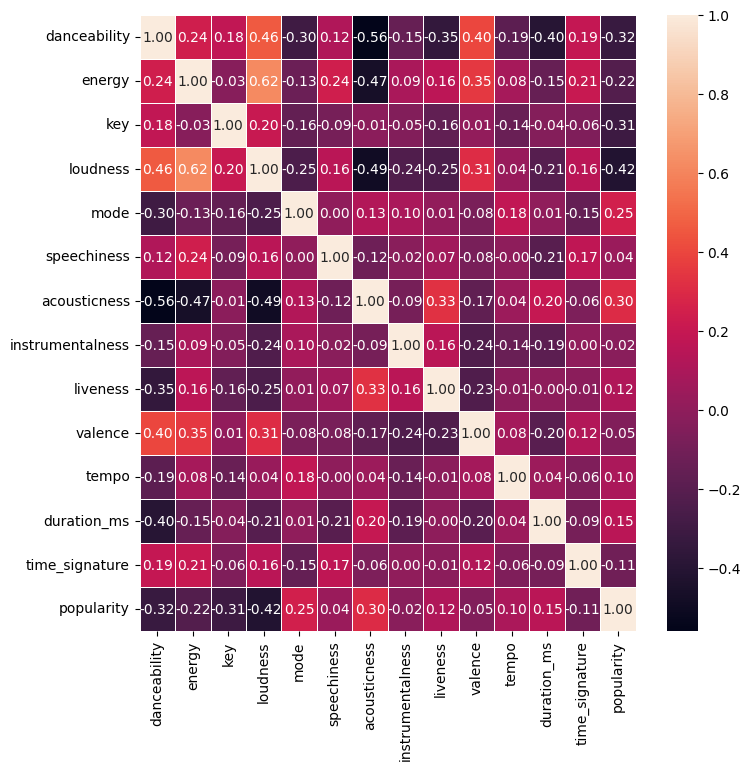

In [ ]:
# Eduarda
# Plota a correlação em um heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True, fmt=".2f", linewidth=.5)
plt.show()

In [ ]:
# Quais são as 10 músicas mais populares?
df_features_completo.sort_values('popularity', ascending = False)['track_name'].head(10)

8              Sintomas de Prazer
56                       Maldivas
43              Insônia - Ao Vivo
3                   Brigas Demais
19    Não vá me enganar - Ao Vivo
49               Cigana - Ao Vivo
62              Ela Não - Ao vivo
68         Amor Difícil - Ao vivo
20          Teu Segredo - Ao Vivo
38       Sinais de fogo - Ao Vivo
Name: track_name, dtype: object

In [ ]:
df_todos_singles.isnull().sum()

tipo                   0
artista                0
paises_disponiveis     0
id                     0
musica                 0
data_lancamento        0
precisao_lancamento    0
total_faixa            0
dtype: int64

In [ ]:
#Pegando info do DataFrame
df_todos_singles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tipo                 101 non-null    object
 1   artista              101 non-null    object
 2   paises_disponiveis   101 non-null    object
 3   id                   101 non-null    object
 4   musica               101 non-null    object
 5   data_lancamento      101 non-null    object
 6   precisao_lancamento  101 non-null    object
 7   total_faixa          101 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [ ]:
df_todos_albuns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_faixa,9.0,15.666667,5.074446,10.0,12.0,15.0,17.0,24.0


In [ ]:
#Fazendo contagem das músicas single
contagem_de_musica = df_todos_singles["musica"].value_counts().to_frame().reset_index()
contagem_de_musica.head()

,index,musica
0,Fala Mal de Mim,2
1,"I'm Good (Blue) [feat. Bebe Rexha, Ludmilla an...",1
2,Pulando na pipoca,1
3,Qualidade De Vida (Ao Vivo),1
4,Melhor pra mim,1


In [ ]:
# Definindo o dataFrame dos Gêneros Musicais
genero_musical = pd.DataFrame(result['genres'])
genero_musical.head()

,0
0,funk carioca
1,funk pop
2,funk rj
3,pagode baiano
4,pop nacional


In [ ]:
#Top 10 músicas mais ouvida
top_10_musicas = df_todos_singles['musica'].value_counts().reset_index(name='contagem')

# Ordene o DataFrame pelo número de reproduções em ordem decrescente
top_10_musicas = top_10_musicas.sort_values(by='contagem', ascending=False)

# Selecione as 10 músicas mais ouvidas
top_10_musicas = top_10_musicas.head(10)

# Exiba o DataFrame resultante
print(top_10_musicas)

                                                index  contagem
0                                     Fala Mal de Mim         2
63                                    Solteiras Shake         1
73                                Me Espera (Ao Vivo)         1
72  Coração Deserto / Ninguém Merece Amar Sozinho ...         1
71                                          VILÃ LIVE         1
70                               Brigas Demais - Live         1
69                          Sintomas de Prazer - Live         1
68                                     Ritmo Do Crime         1
67                              Insegurança (Ao Vivo)         1
66                                         Zangadinha         1


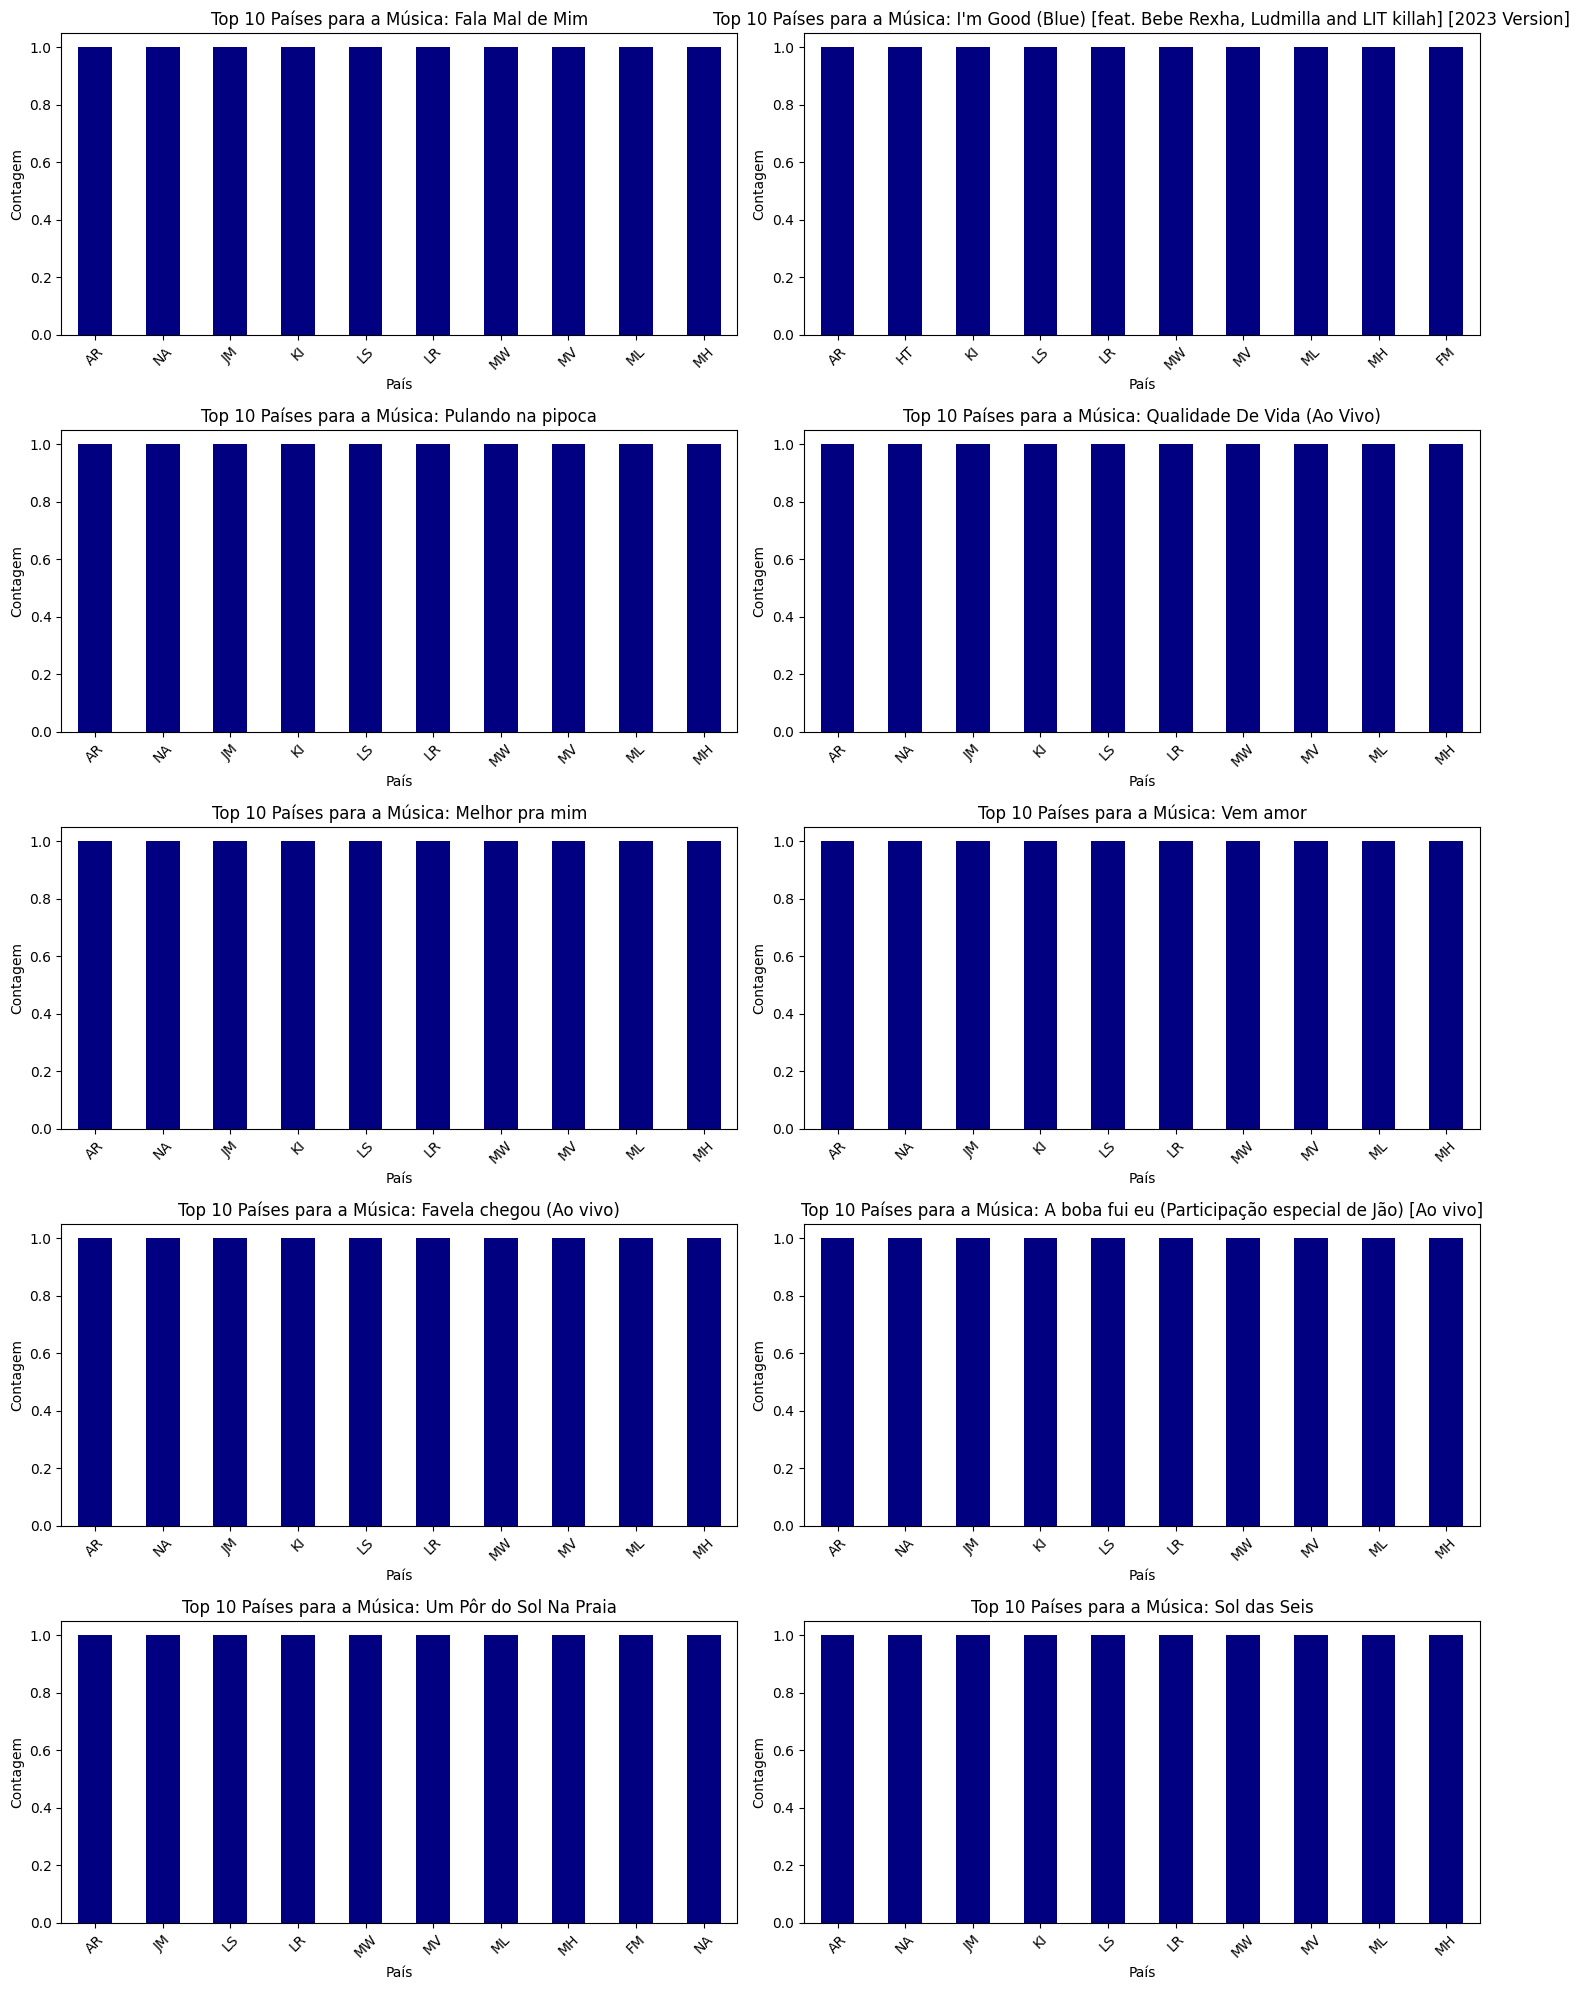

In [ ]:
# Obtém as 10 músicas mais ouvidas
top_10_musicas = df_todos_singles['musica'].value_counts().head(10).index

# Configura o tamanho da figura global
plt.figure(figsize=(15, 20))

# Loop pelas 10 músicas mais ouvidas
for i, musica in enumerate(top_10_musicas):
    # Obtém a lista de países para a música atual
    paises_da_musica = df_todos_singles[df_todos_singles['musica'] == musica]['paises_disponiveis'].values[0]

    # Conta a frequência de cada país na lista
    contagem_paises = pd.Series(paises_da_musica).value_counts()

    # Seleciona os top 10 países
    top_10_paises = contagem_paises.head(10)

    # Cria um subplot para cada música
    plt.subplot(5, 2, i + 1)
    top_10_paises.plot(kind='bar', color='navy')
    plt.title(f'Top 10 Países para a Música: {musica}')
    plt.xlabel('País')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)

# Ajusta o layout global
plt.tight_layout()
plt.show()

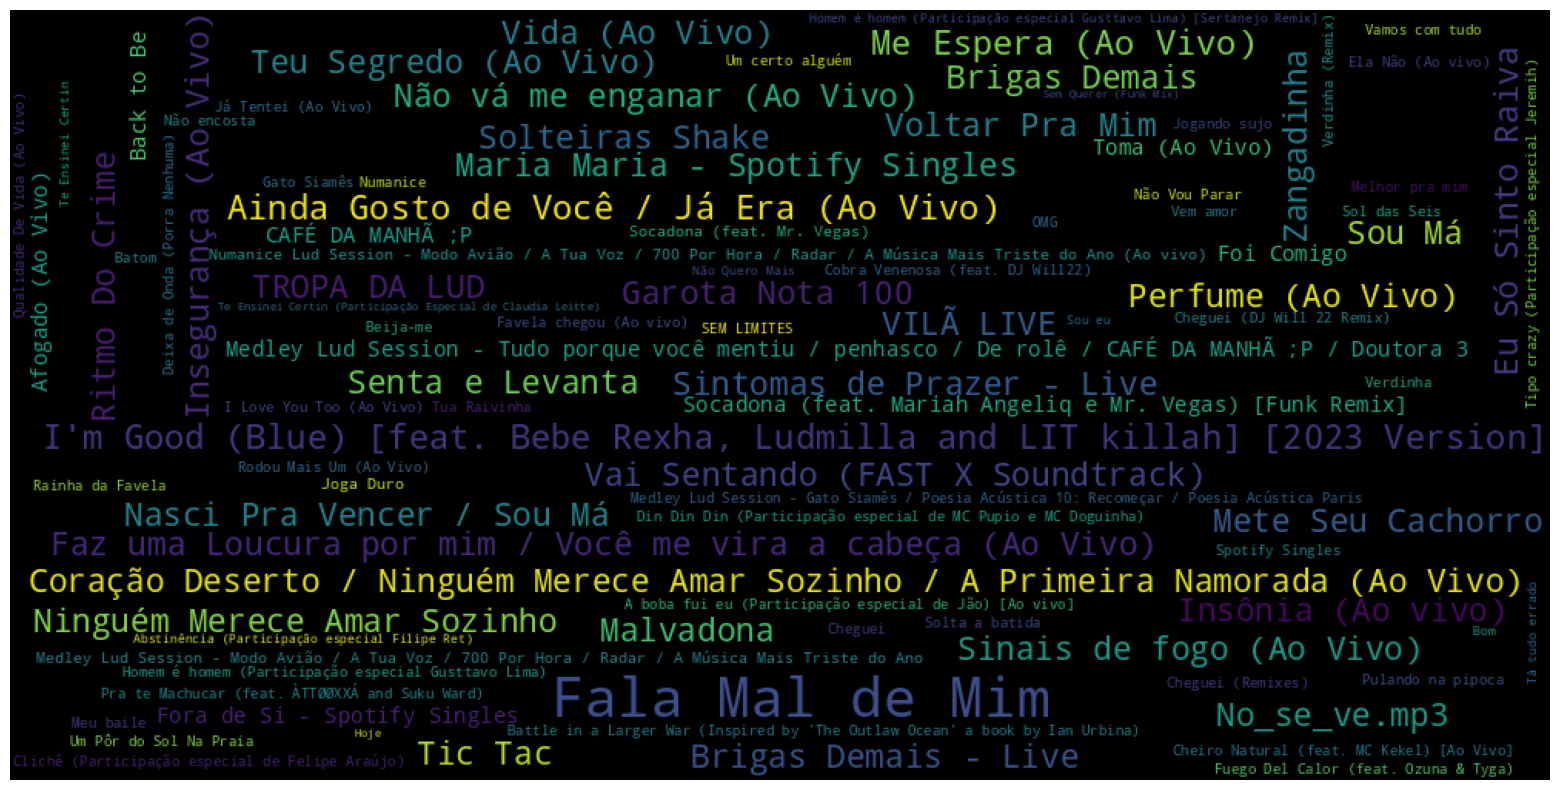

In [ ]:
#Nuvem de música
from wordcloud import WordCloud
from collections import Counter
todas_as_musicas = [faixa for faixa in df_todos_singles['musica']]
musica = Counter(todas_as_musicas)

wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(musica)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis('off');

#Teste - Single

In [ ]:
all_countries = [country for countries in df_todos_singles['paises_disponiveis'] for country in countries]
country_counts = sns.histplot(all_countries, kde=True, ax=ax[0], color="navy")
ax[0].set_xlabel("paises_disponiveis", fontsize=15)

## DataFrame de Singles